# Image & Text Embeddings

In this program we'll use the CLIP model to find similar images via query. The query can come in a shape of either text or image.

Source Dataset: [Unsplash Dataset Lite](https://unsplash.com/data).

Note: This data set contains 25k images which is a small, specific terms may not be found.

#### install liberties

In [1]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=39130b711f2c79d91f020bce7315d539ee10ee48875183314459cc0e0809637d
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


#### Import liberties

In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm
torch.set_num_threads(4)

#### load the model

In [3]:
model = SentenceTransformer('clip-ViT-B-32')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

0_CLIPModel/config.json:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

0_CLIPModel/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

0_CLIPModel/preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

0_CLIPModel/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

0_CLIPModel/tokenizer_config.json:   0%|          | 0.00/604 [00:00<?, ?B/s]

0_CLIPModel/vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

#### Get the dataset

In [4]:
img_folder = 'photos/'
if not os.path.exists(img_folder) or len(os.listdir(img_folder)) == 0:
    os.makedirs(img_folder, exist_ok=True)

    photo_filename = 'unsplash-25k-photos.zip'
    if not os.path.exists(photo_filename):   # Download dataset if does not exist
        util.http_get('http://sbert.net/datasets/'+photo_filename, photo_filename)

    # Extract images
    with zipfile.ZipFile(photo_filename, 'r') as zf:
        for member in tqdm(zf.infolist(), desc='Extracting'):
            zf.extract(member, img_folder)


  0%|          | 0.00/1.92G [00:00<?, ?B/s]

Extracting:   0%|          | 0/24996 [00:00<?, ?it/s]

### Compute the embeddings
####We'll use pre-computed embeddings.
#### anyway, it could be done manually via the following line:
#### model.encode(Image.open(filepath)).


In [5]:
use_precomputed_embeddings = True

if use_precomputed_embeddings:
    emb_filename = 'unsplash-25k-photos-embeddings.pkl'
    if not os.path.exists(emb_filename):   # Download dataset if does not exist
        util.http_get('http://sbert.net/datasets/'+emb_filename, emb_filename)

    with open(emb_filename, 'rb') as fIn:
        img_names, img_emb = pickle.load(fIn)
    print("Images:", len(img_names))
else:
    img_names = list(glob.glob('unsplash/photos/*.jpg'))
    print("Images:", len(img_names))
    img_emb = model.encode([Image.open(filepath) for filepath in img_names], batch_size=128, convert_to_tensor=True, show_progress_bar=True)


  0%|          | 0.00/51.8M [00:00<?, ?B/s]

Images: 24996


### Define Search function.

In [6]:
# Search function.
def search(query, k=3):
    # Encode the query (can either be an image or a string)
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)

    # computes the cosine-similarity between the query embedding and all image embeddings.
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]

    print("Query:")
    display(query)
    for hit in hits:
        print(img_names[hit['corpus_id']])
        display(IPImage(os.path.join(img_folder, img_names[hit['corpus_id']]), width=200))


Query:


'cat and dog'

Ivzo69e18nk.jpg


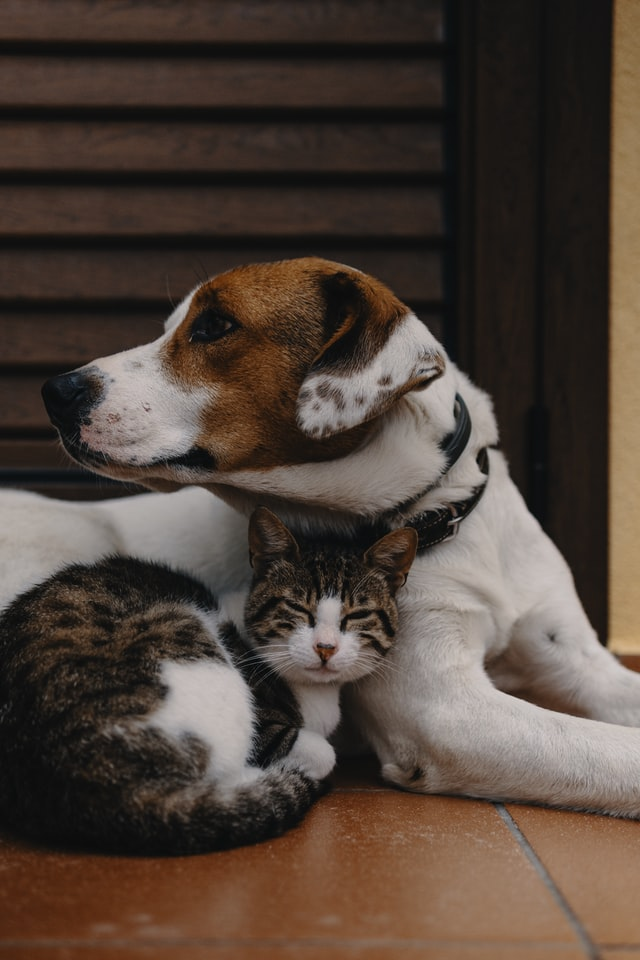

aPtPQFyLxMM.jpg


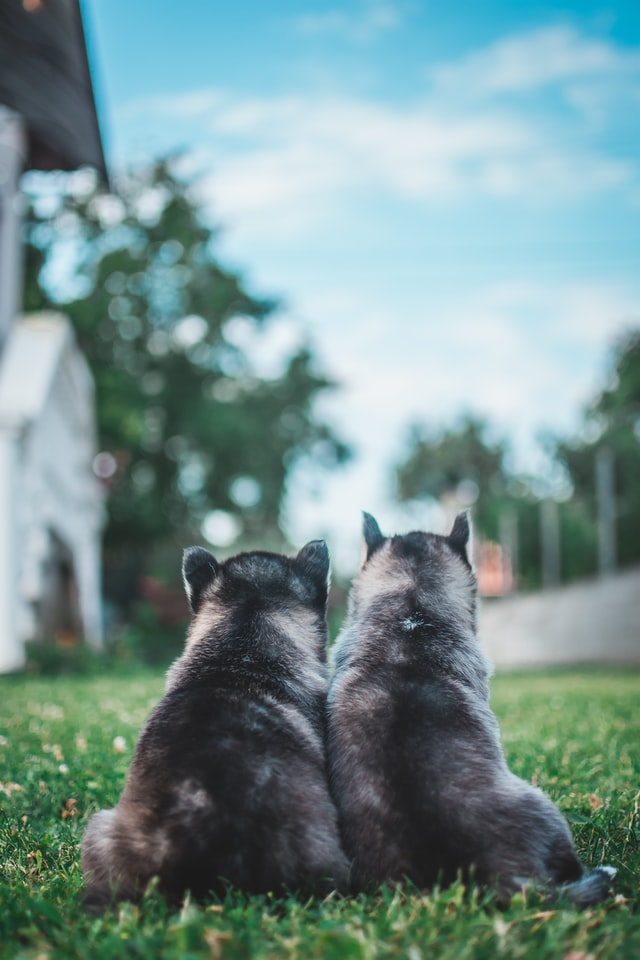

9gz3wfHr65U.jpg


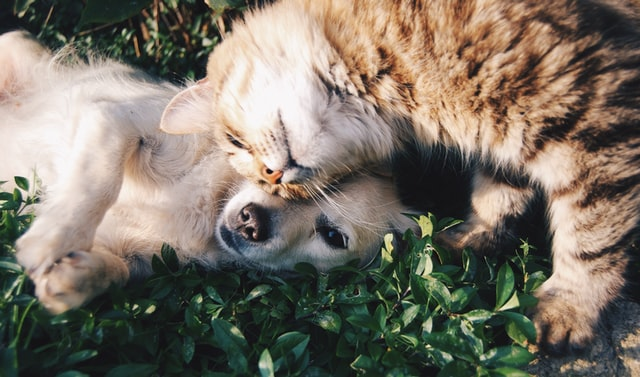

In [7]:
search("cat and dog")

Query:


'sunset over mountains'

KGzXJB6zneM.jpg


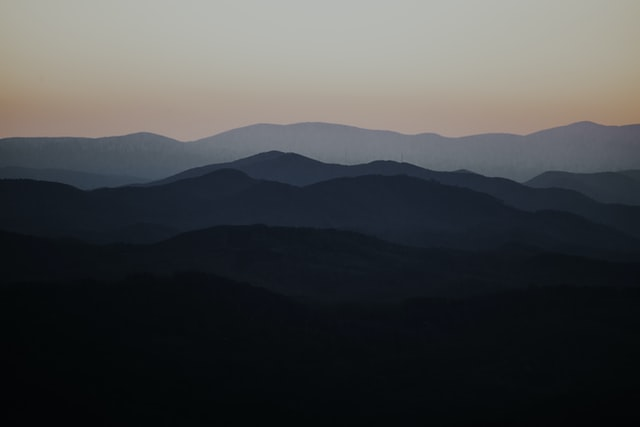

MNrYmRgM7mg.jpg


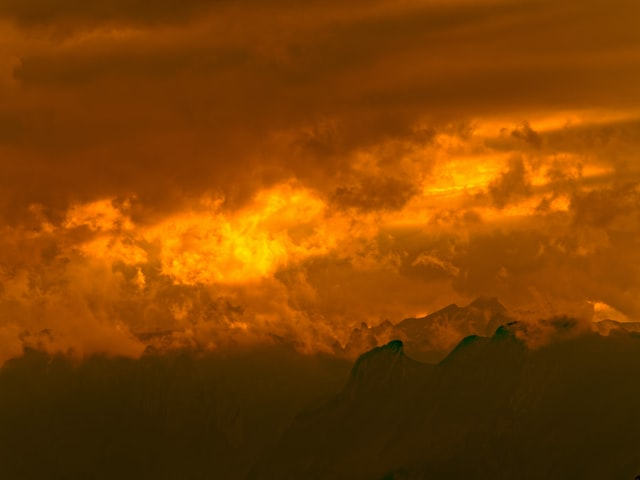

7FAFY8iYBXM.jpg


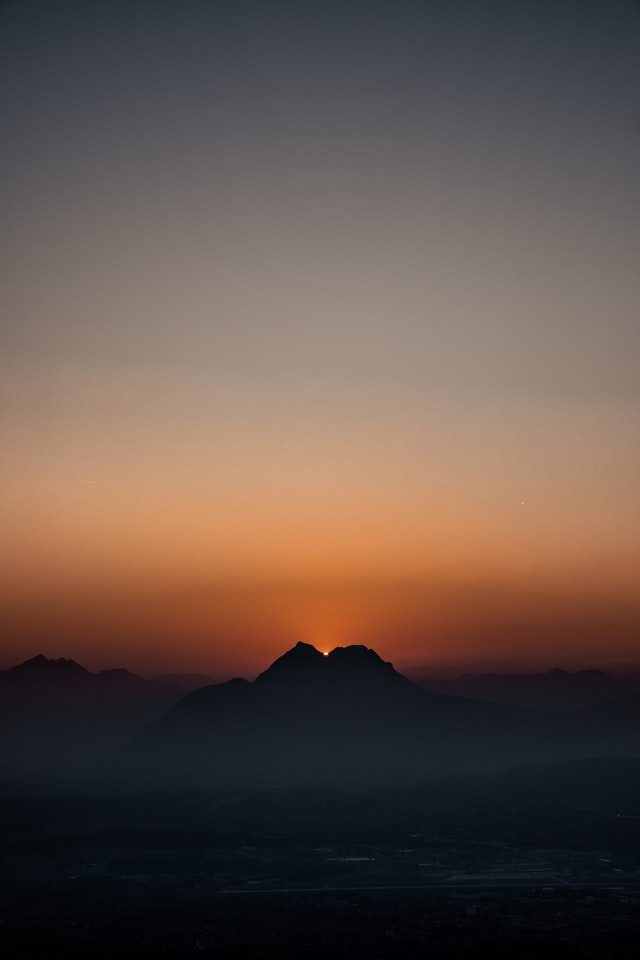

In [8]:
search("sunset over mountains")

Query:


'geometric structures'

db1r-AjW6YM.jpg


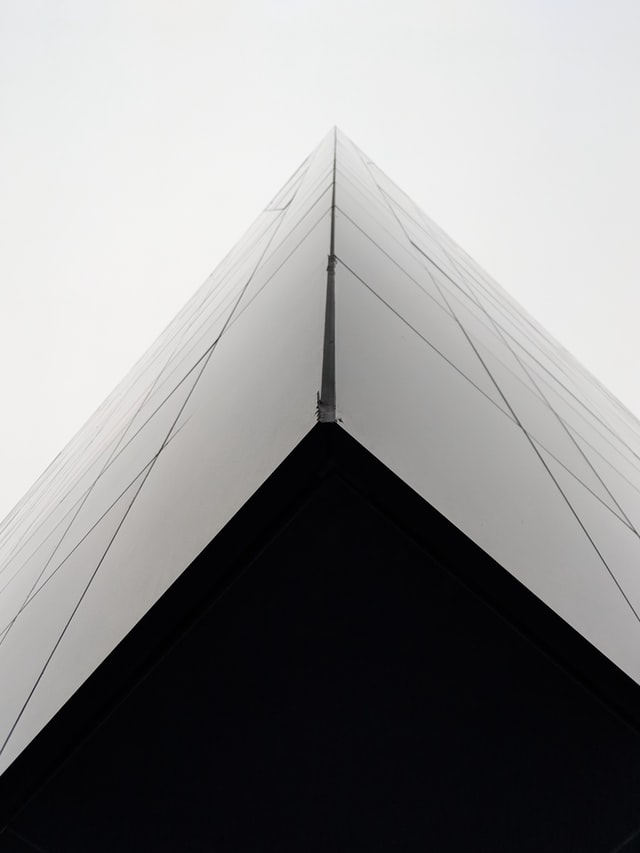

Q8x0hSBMMGk.jpg


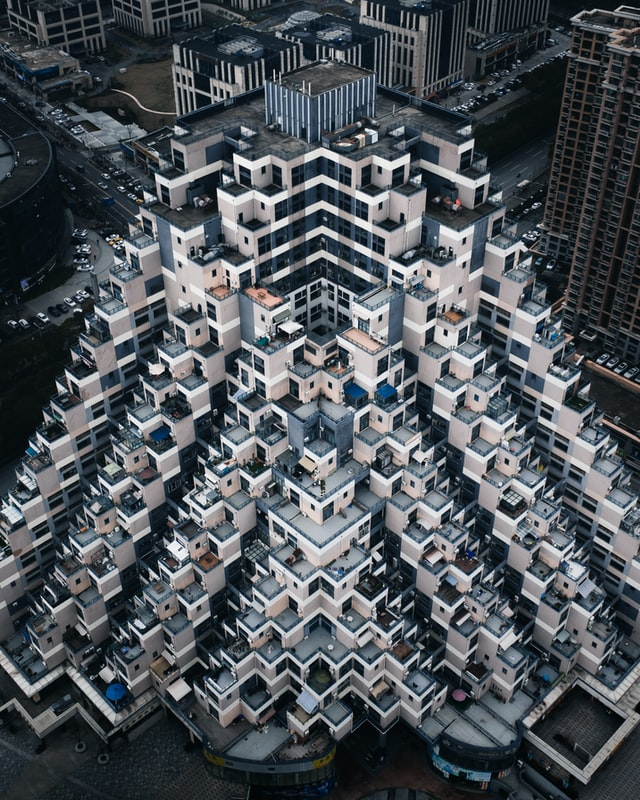

LkiFg9Yqq1s.jpg


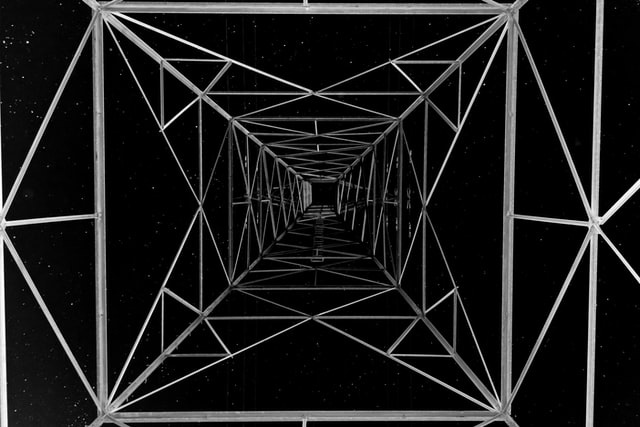

In [9]:
search("geometric structures")

Query:


'Dog on the beach'

53nKeaK402I.jpg


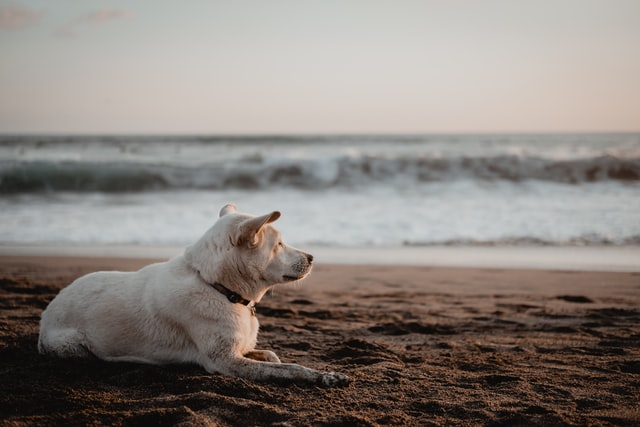

U_5ePt5_IaU.jpg


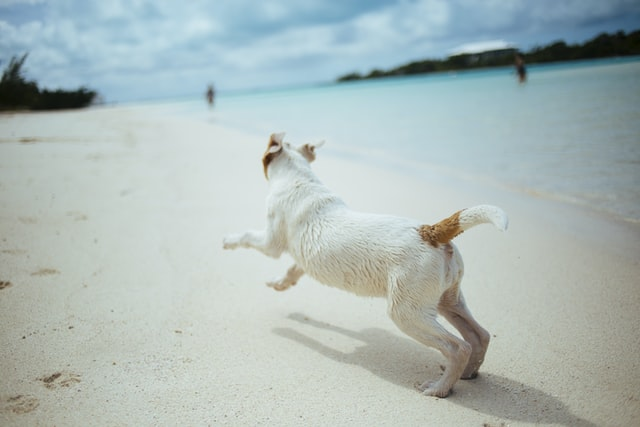

e-Bvu4S6sII.jpg


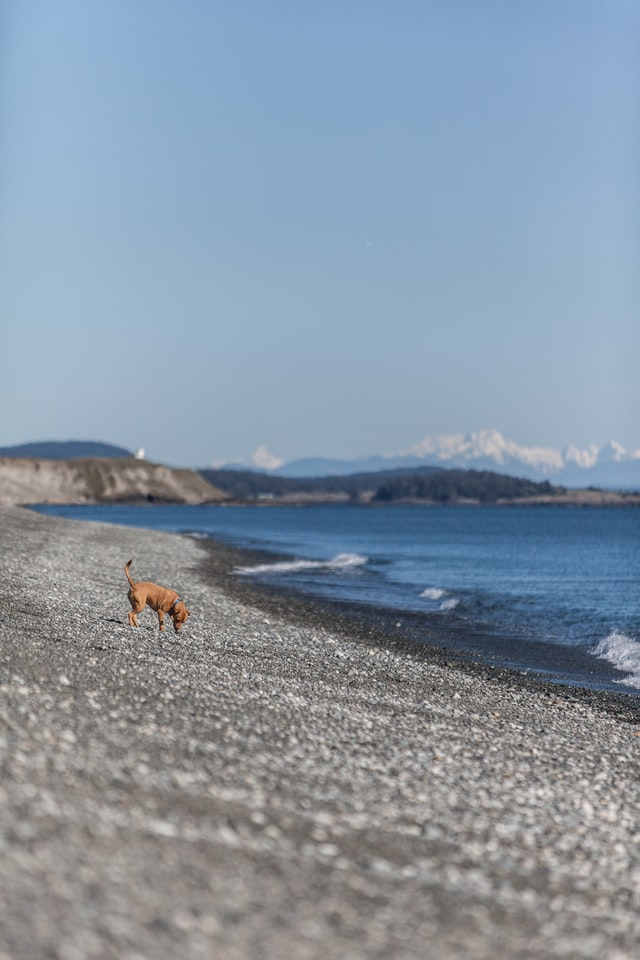

In [ ]:
search("Dog on the beach")

Query:


'food art'

frzHLsysu5s.jpg


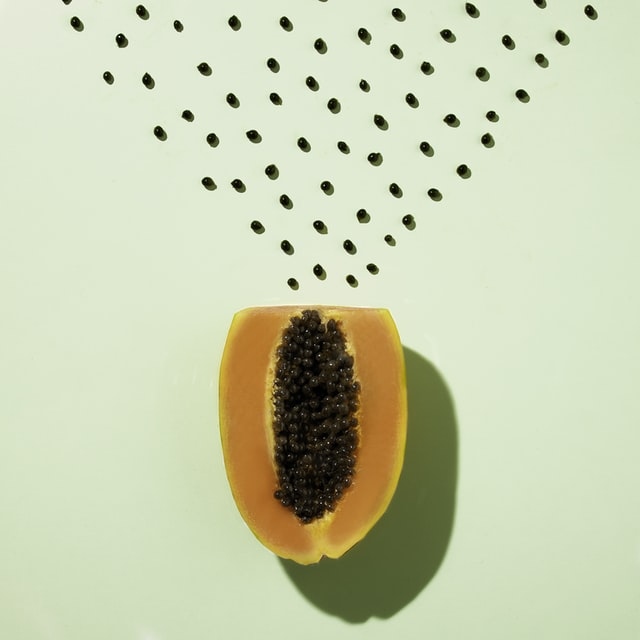

nbFj-irjNq4.jpg


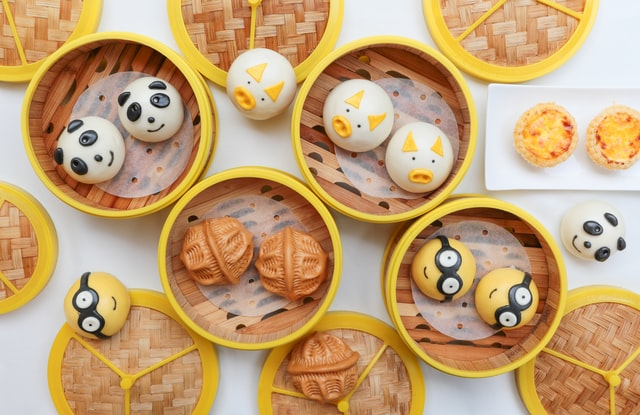

STvPYOyMnNo.jpg


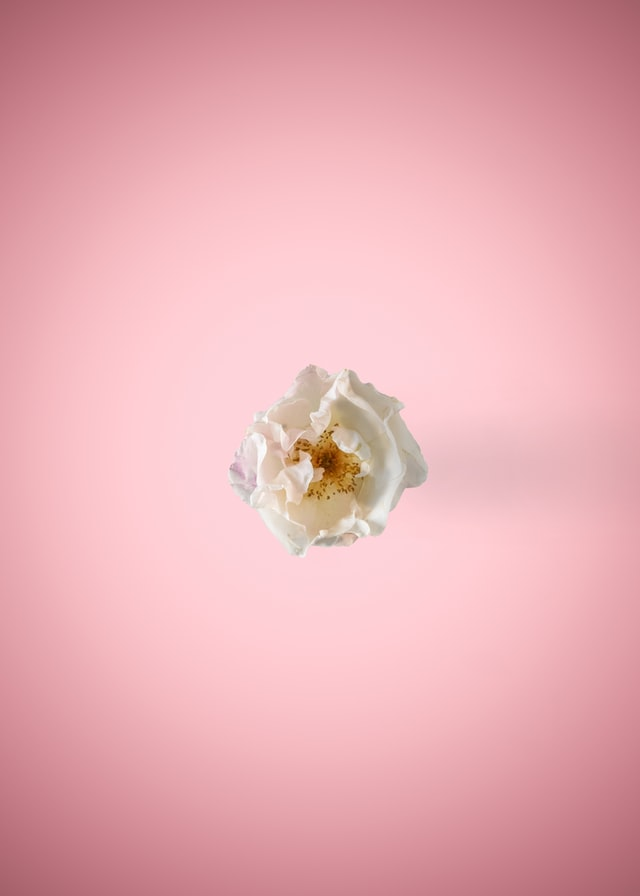

In [10]:
search("food art")

# Image-to-Image Search
We can use the method also for image-to-image search.

To achieve this, we pass `Image.open('path/to/image.jpg')` to the search method.

It will then return the k similar images

Query:


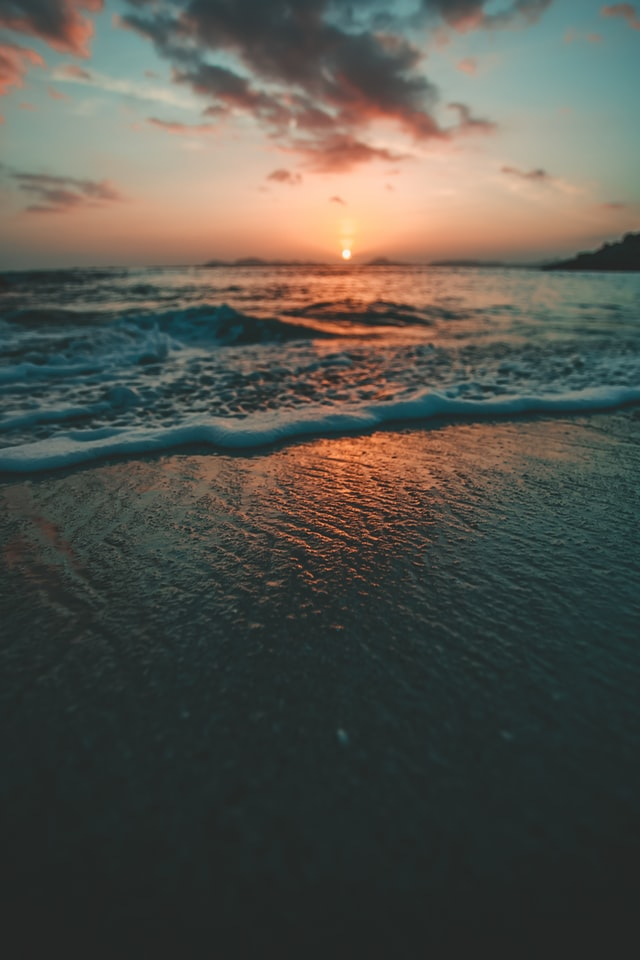

nfQ2QGhdQNc.jpg


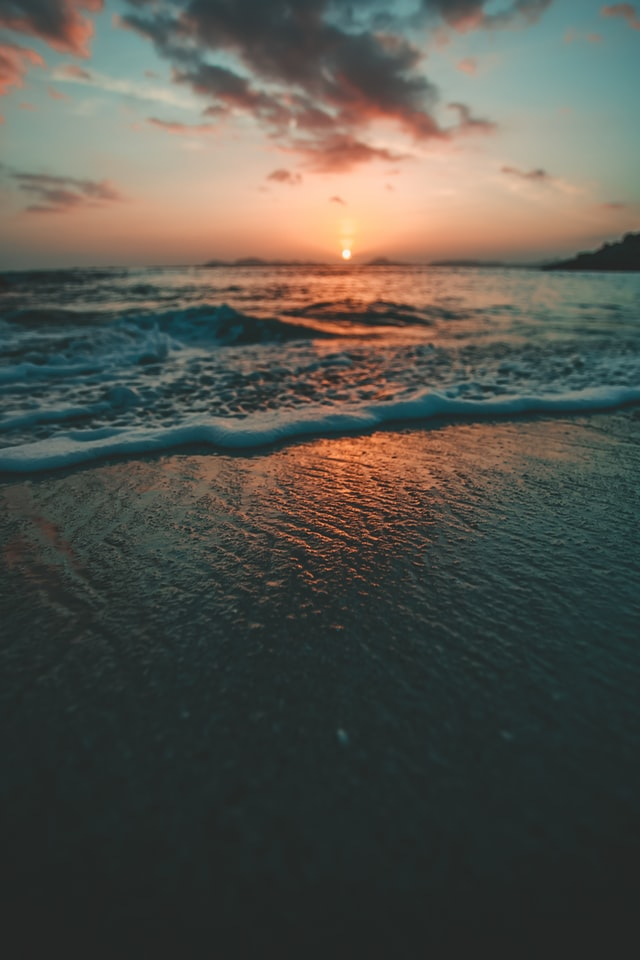

jpppBJXLeZw.jpg


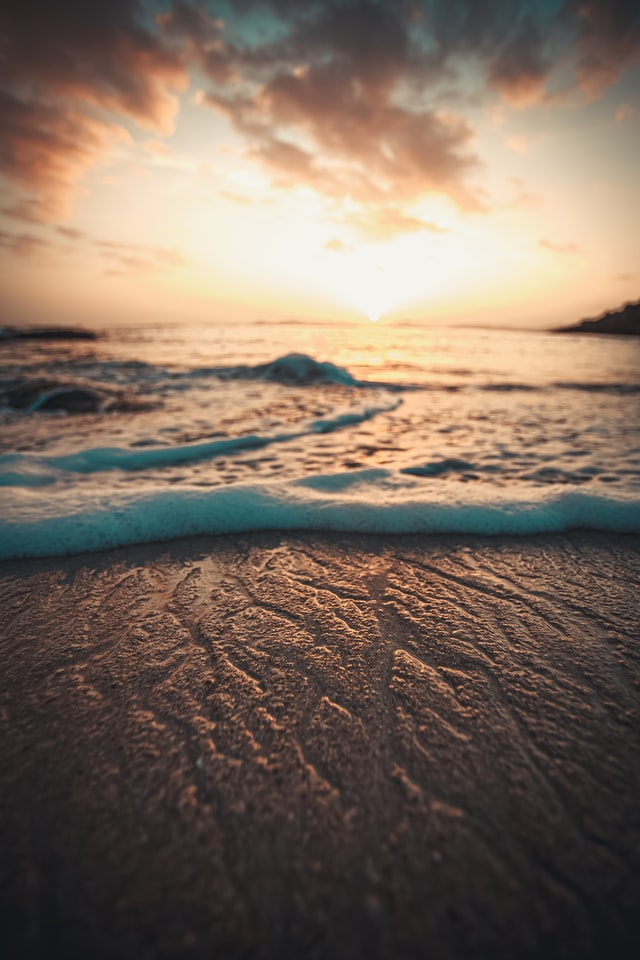

ElCaJL4wAms.jpg


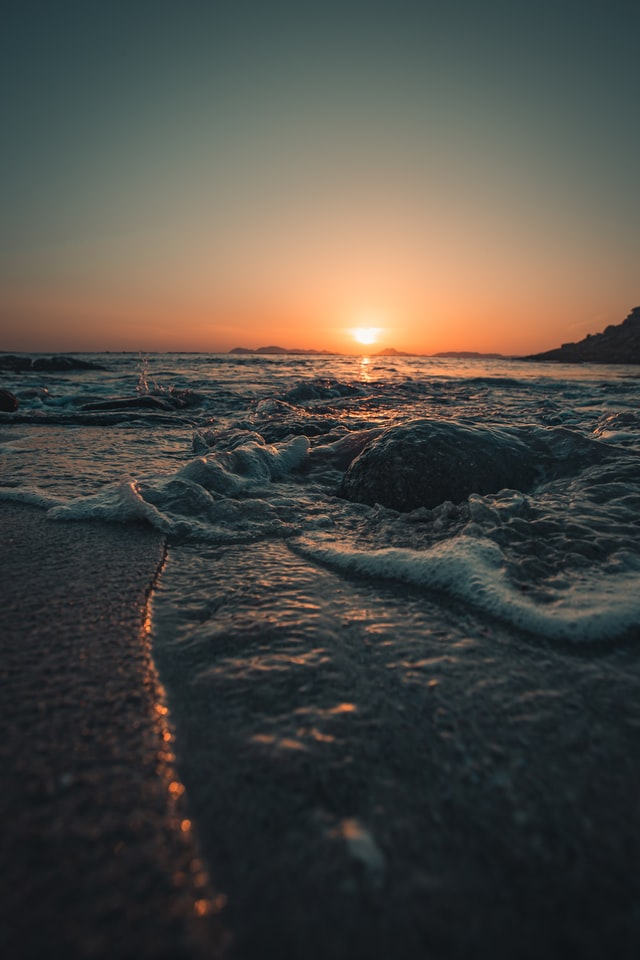

1o01t_-ZFuA.jpg


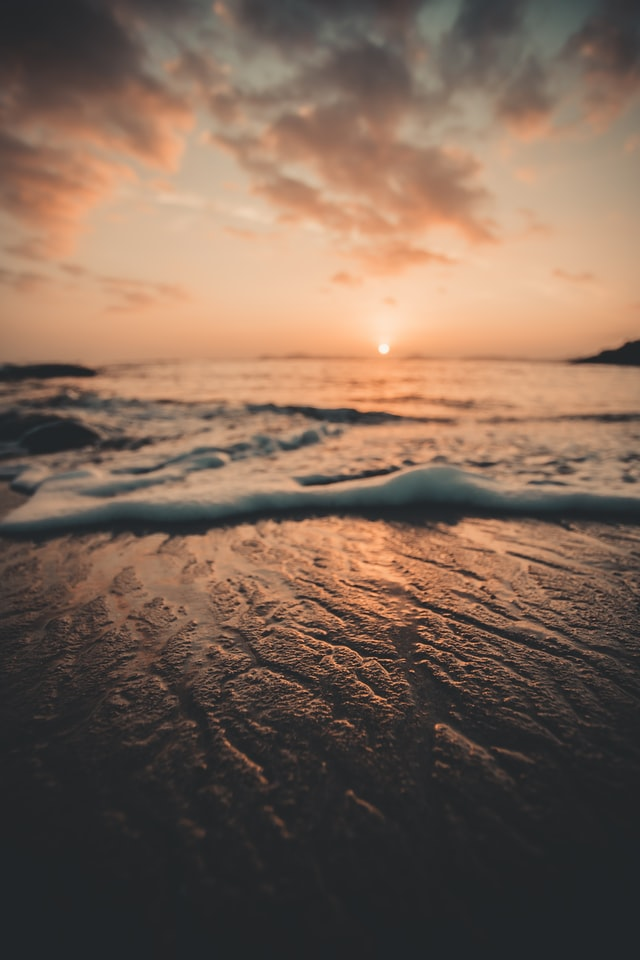

Bz4dHv-9PFQ.jpg


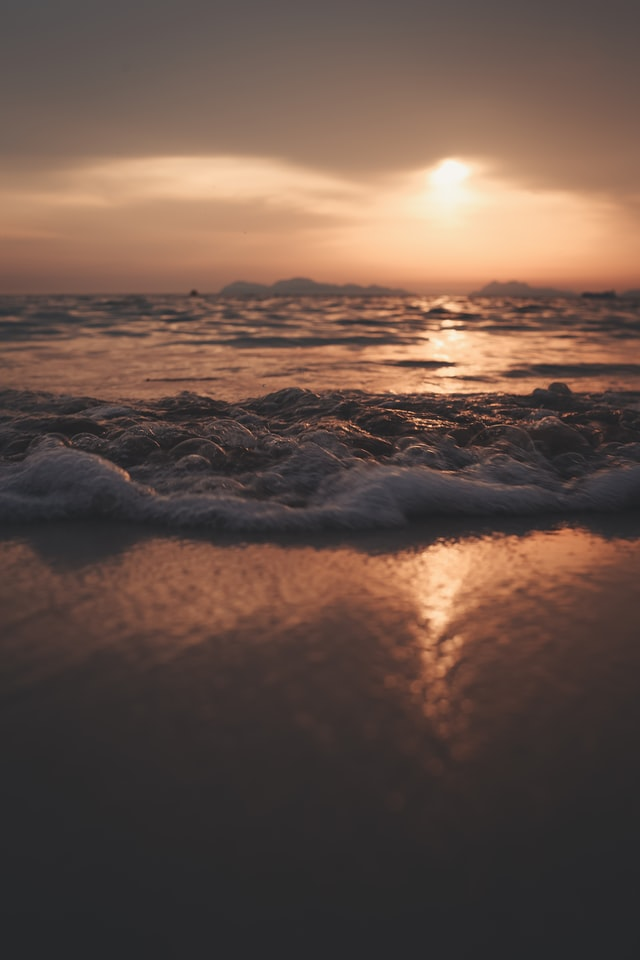

In [12]:
search(Image.open(os.path.join(img_folder, 'nfQ2QGhdQNc.jpg')), k=5)

### Now, we'll see the same model but in a different version of it.
#### The model

```
'clip-ViT-B-32-multilingual-v1'
```
#### will basically function the same and serve the same purpose in our project as the model

```
'clip-ViT-B-32'
```

#### we saw before
### There are 2 Key difference between the models regarding our project:

1.
```
'clip-ViT-B-32-multilingual-v1'
```
able to read a query search in 50+ languages, such as : ar, bg, ca, cs, da, de, el, es, et, fa, fi, fr, fr-ca, gl, gu, he, hi, hr, hu, hy, id, it, ja, ka, ko, ku, lt, lv, mk, mn, mr, ms, my, nb, nl, pl, pt, pt, pt-br, ro, ru, sk, sl, sq, sr, sv, th, tr, uk, ur, vi, zh-cn, zh-tw.

2.
```
'clip-ViT-B-32-multilingual-v1'
```
not able to get images as a search query, so if you want to search image-to-image, make sure to use
```
'clip-ViT-B-32'
```

#### Load the model

In [13]:
multilingual_model = SentenceTransformer('clip-ViT-B-32-multilingual-v1')

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.57M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/371 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

### Define the search function for the multilingual_model

In [14]:
def search_lingustic(query, k=3):
    # We encode the query (which can be only a text string)
    query_emb = multilingual_model.encode([query], convert_to_tensor=True, show_progress_bar=False)

    # computes the cosine-similarity and return the top_k highest ranked images
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]

    print("Query:")
    display(query)
    for hit in hits:
        print(img_names[hit['corpus_id']])
        display(IPImage(os.path.join(img_folder, img_names[hit['corpus_id']]), width=200))

Query:


'גלקסיות'

__U6tHlaapI.jpg


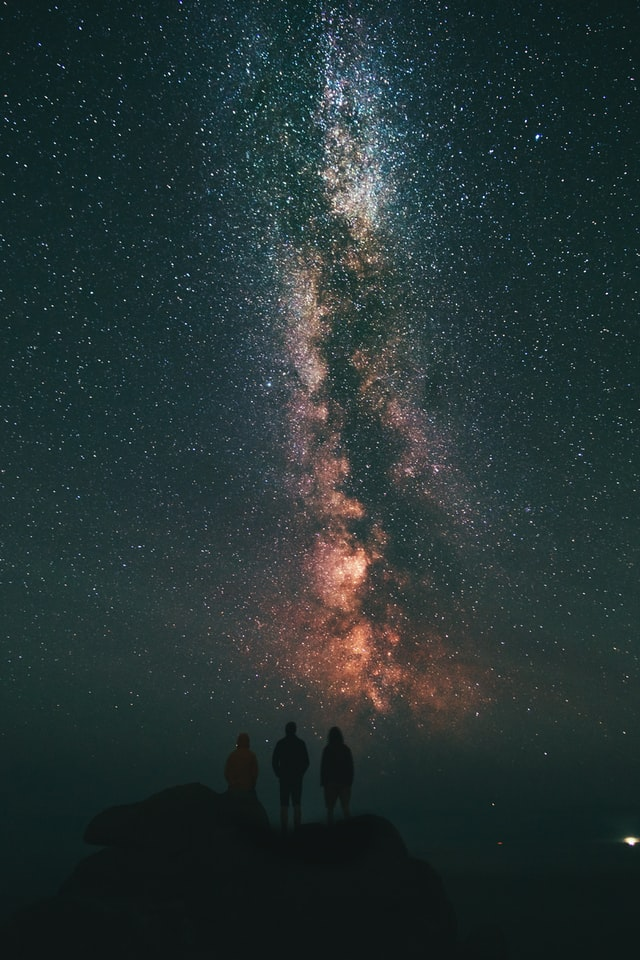

Af5SVVxBmPg.jpg


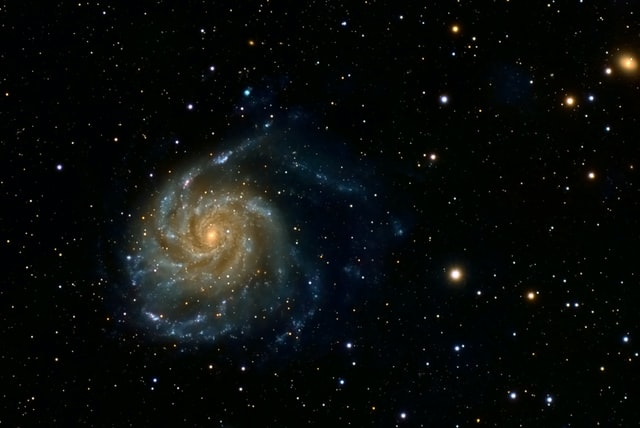

YvRTYzkT6Hs.jpg


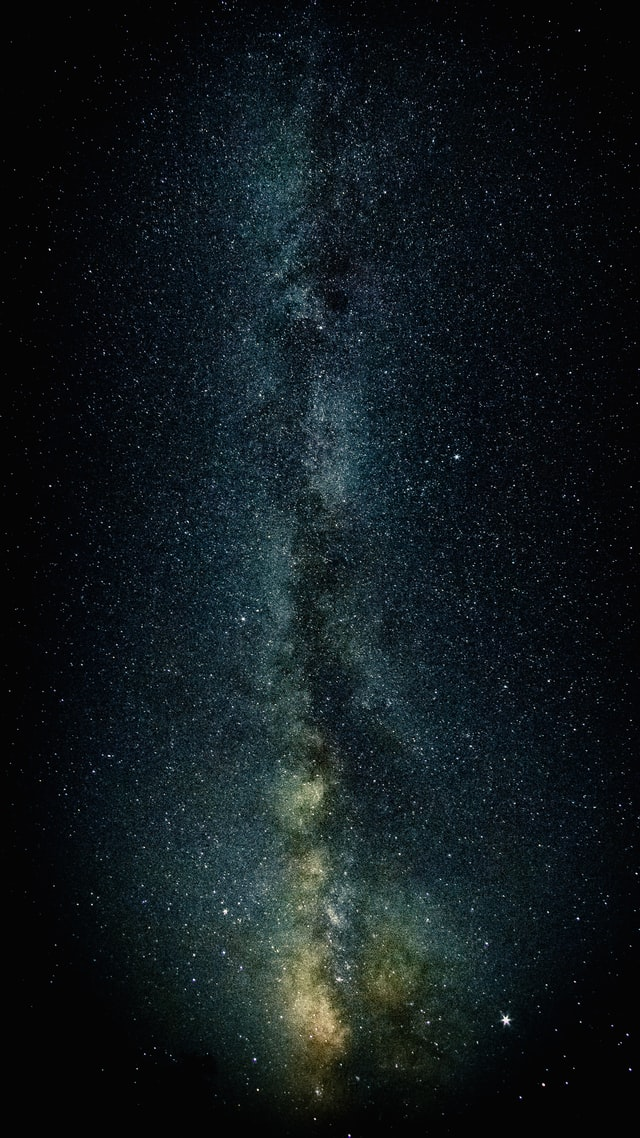

In [16]:
#Hebrew: galaxies
search_lingustic("גלקסיות")

Query:


'夜の東京'

fFmCevlfWlo.jpg


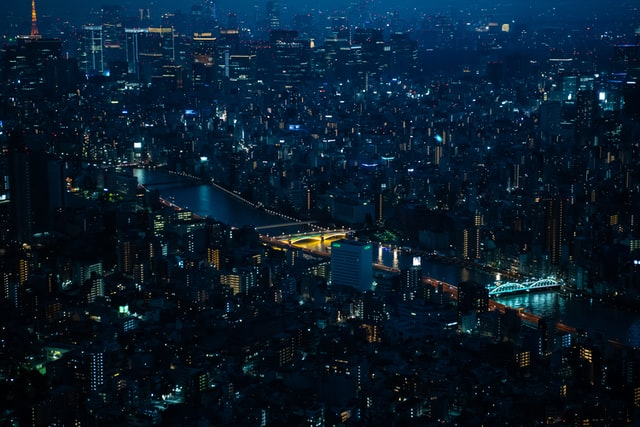

oVMjj1ub5kw.jpg


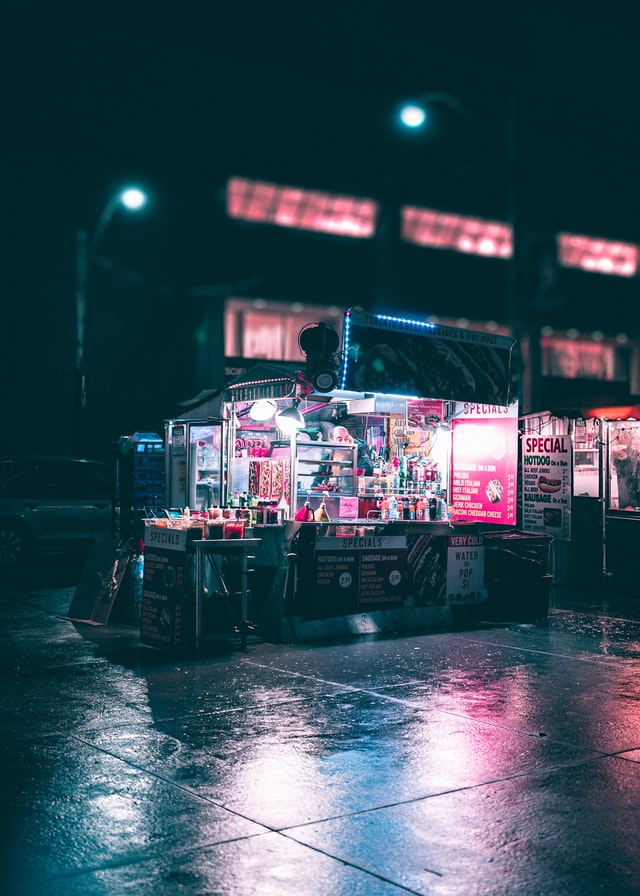

1mvRowZSXIk.jpg


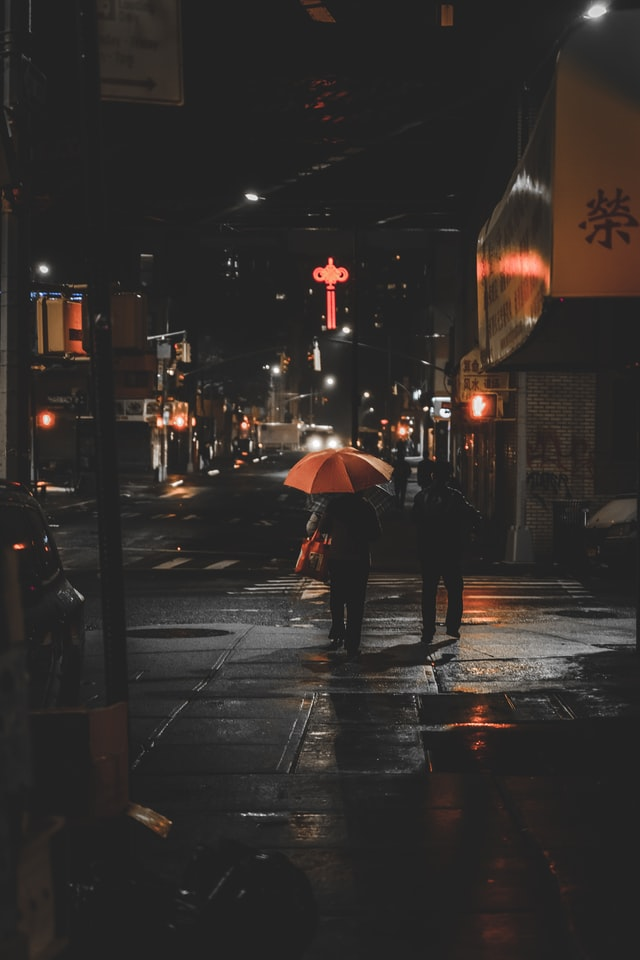

In [21]:
# Japanese: Tokyo at night
search_lingustic("夜の東京")

Query:


'Muchos peces'

H22jcGTyrS4.jpg


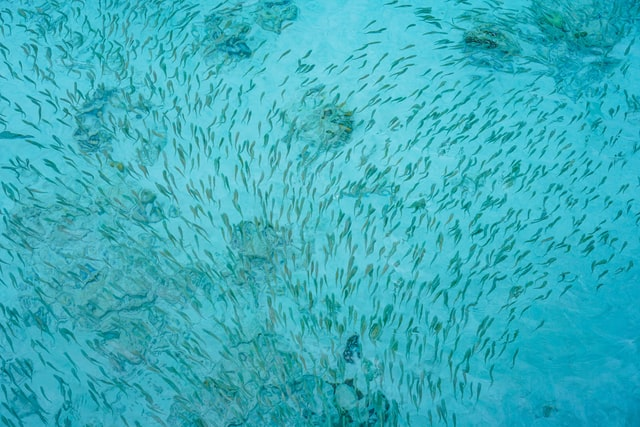

CJ_9I6aXSnc.jpg


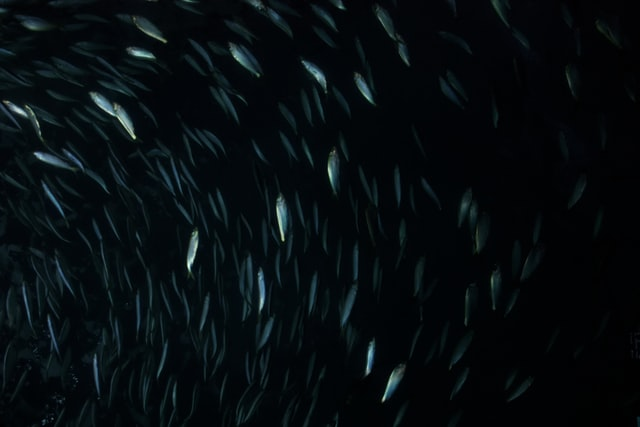

_MJKaRig1Ic.jpg


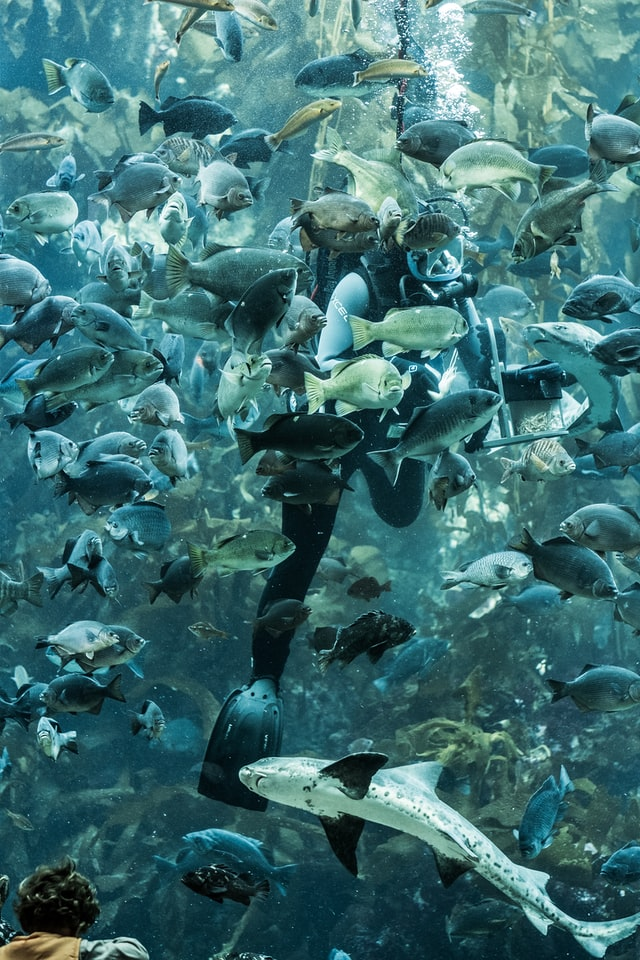

In [26]:
#Spanish: Many fish
search_lingustic("Muchos peces")